In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [91]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [93]:
df.shape

(11162, 17)

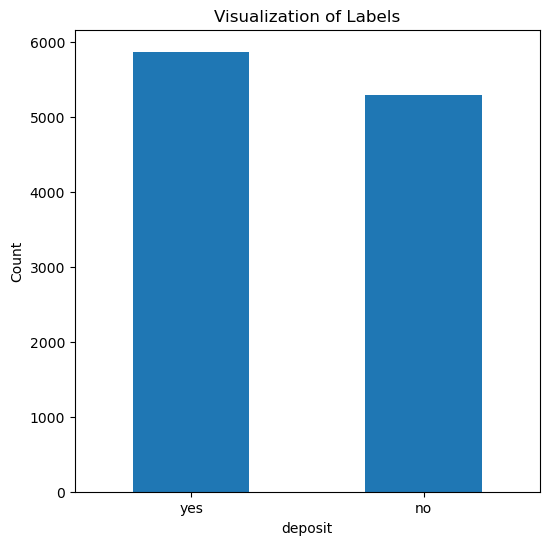

In [95]:
#Check for imbalance

# plotting bar chart for legit & fraud transaction
plt.figure(figsize=(6,6))
labels = df['deposit'].unique()
count_classes = df.value_counts(df['deposit'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

#### TARGET VARIABLE BALANCED

In [97]:
#Check for null values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [99]:
df.duplicated().sum()

0

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


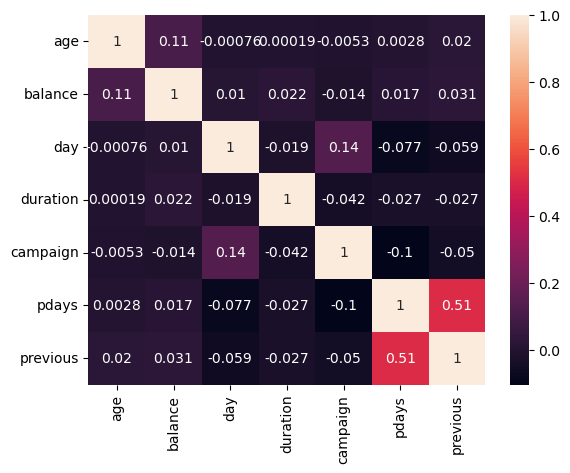

In [101]:
corr = df.corr(numeric_only=True)
sns.heatmap(data=corr, annot=True)
corr

In [103]:
new_df = df.copy()

### LABEL ENCODING

In [105]:
new_df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [107]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [109]:
new_df['deposit'] = new_df['deposit'].map({"yes": 1, "no": 0})

In [111]:
new_df['deposit'].unique()

array([1, 0], dtype=int64)

In [113]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [115]:
objList = new_df.select_dtypes(include = "object").columns
print(objList)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [117]:
for col in objList:
    print(f"unique features of {col}, {df[col].unique()}")

unique features of job, ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
unique features of marital, ['married' 'single' 'divorced']
unique features of education, ['secondary' 'tertiary' 'primary' 'unknown']
unique features of default, ['no' 'yes']
unique features of housing, ['yes' 'no']
unique features of loan, ['no' 'yes']
unique features of contact, ['unknown' 'cellular' 'telephone']
unique features of month, ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
unique features of poutcome, ['unknown' 'other' 'failure' 'success']


In [121]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables

encoders = {}  # Dictionary to store encoders

for col in objList:
    encoder = LabelEncoder()  # Create a new LabelEncoder for each column
    new_df[col] = encoder.fit_transform(new_df[col])
    encoders[col] = encoder  # Store the encoder
    print(f"Mapping for {col}: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}")

# Show transformed data
new_df.head()


Mapping for job: {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
Mapping for marital: {'divorced': 0, 'married': 1, 'single': 2}
Mapping for education: {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
Mapping for default: {'no': 0, 'yes': 1}
Mapping for housing: {'no': 0, 'yes': 1}
Mapping for loan: {'no': 0, 'yes': 1}
Mapping for contact: {'cellular': 0, 'telephone': 1, 'unknown': 2}
Mapping for month: {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
Mapping for poutcome: {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [123]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [125]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int32
 2   marital    11162 non-null  int32
 3   education  11162 non-null  int32
 4   default    11162 non-null  int32
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int32
 7   loan       11162 non-null  int32
 8   contact    11162 non-null  int32
 9   day        11162 non-null  int64
 10  month      11162 non-null  int32
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int32
 16  deposit    11162 non-null  int64
dtypes: int32(9), int64(8)
memory usage: 1.1 MB
None


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

### DATA SPLITING

In [129]:
X = new_df.drop('deposit', axis=1)
y = new_df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [131]:
y_train.value_counts()

deposit
0    4707
1    4222
Name: count, dtype: int64

In [137]:
import joblib
import os
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define base models for voting
base_models = [
    ("RandomForest", RandomForestClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("GradientBoosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Bagging", BaggingClassifier()),
    ("XGBoost", XGBClassifier())
]

# Create a Voting Classifier (Soft Voting since XGB supports predict_proba)
voting_clf = VotingClassifier(estimators=base_models, voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Save the trained Voting Classifier
model_path = "VotingClassifier.pkl"
joblib.dump(voting_clf, model_path)

# Evaluate the model
y_pred = voting_clf.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("\n🔹 Model: VotingClassifier")
print(f"✅ Accuracy Score: {test_score:.4f}")
print(f"📊 Classification Report:\n{report}")
print(f"💾 Model saved at: {model_path}")
print("*" * 100)

print("✅ Voting Classifier trained and saved in the same directory!")



🔹 Model: VotingClassifier
✅ Accuracy Score: 0.8370
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.86      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233

💾 Model saved at: VotingClassifier.pkl
****************************************************************************************************
✅ Voting Classifier trained and saved in the same directory!


#### TESTING THE MODEL

In [140]:
voting_clf = joblib.load("VotingClassifier.pkl")

In [142]:
sample = X_test.sample(n=3, axis=0, random_state=42)
sample

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9923,43,9,2,1,0,1195,1,0,2,15,8,516,9,-1,0,3
9599,80,5,1,0,0,1021,0,0,1,26,3,37,1,-1,0,3
7699,57,4,1,1,0,657,1,0,1,11,8,20,5,-1,0,3


In [148]:
y_pred = voting_clf.predict(sample)
y_proba = voting_clf.predict_proba(sample)

# Display results
for i, (pred, proba) in enumerate(zip(y_pred, y_proba)):
    probability = round(max(proba) * 100, 2)  # Convert to percentage
    outcome = "likely to subscribe" if pred == 1 else "unlikely to subscribe"
    
    print(f"Candidate {i+1} is {probability}% {outcome} to a term deposit.")

Candidate 1 is 60.09% unlikely to subscribe to a term deposit.
Candidate 2 is 58.61% unlikely to subscribe to a term deposit.
Candidate 3 is 87.51% unlikely to subscribe to a term deposit.


In [1]:
%%writefile app.py


from flask import Flask, request, jsonify
import joblib
import numpy as np

# Initialize Flask app
app = Flask(__name__)


model = joblib.load("VotingClassifier.pkl")

@app.route("/")
def home():
    return "Fraud Detection API is running!"

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json()
        features = np.array([list(data.values())], dtype=np.float64).reshape(1, -1)
        prediction = int(model.predict(features)[0])
        probability = float(model.predict_proba(features)[0][1])

        return jsonify({
            "Cadidate Status": "Will Subscribe" if prediction == 1 else "Will not subscribe",
            "Prediction_probability": round(probability, 2)
        })

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5002)


Writing app.py


In [3]:
%%writefile requirements.txt
flask
numpy
joblib
scikit-learn
gunicorn
xgboost



Writing requirements.txt


In [5]:
import requests



sample_data = {
    "age": 35,
    "job": 5,
    "marital": 1,
    "education": 2,
    "default": 0,
    "balance": 850,
    "housing": 1,
    "loan": 0,
    "contact": 1,
    "day": 12,
    "month": 6,
    "duration": 410,
    "campaign": 3,
    "pdays": -1,
    "previous": 0,
    "poutcome": 1
  }

In [11]:
url = "https://term-deposit-api.onrender.com/predict"  
response = requests.post(url, json=sample_data)

print("Status Code:", response.status_code)
print("Response:", response.json())  

Status Code: 200
Response: {'Cadidate Status': 'Will Subscribe', 'Prediction_probability': 0.61}
